In [1]:
import torch
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow

In [2]:
def check_tensor(tensor):
    if isinstance(tensor,list):
        print("Type:",type(tensor))
        print("len:",len(tensor))
    else:
        print("Type:",type(tensor))
        print("Shape:",tensor.shape)
        print("dtype:",tensor.dtype)

def diff_tensor(img1,img2):
    diff = img1-img2
    print("max:",np.max(diff))
    print("minx:",np.min(diff))
    print("mean:",np.mean(abs(diff)))
    print((img1==img2).all())

def show_img(img):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()


## Example1

https://learnopencv.com/homography-examples-using-opencv-python-c/

In [3]:
img_path = './data/test.png'
sign = imread(img_path)
plt.figure(num=None, figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Type: <class 'numpy.ndarray'>
Shape: (589, 587, 3)
dtype: uint8


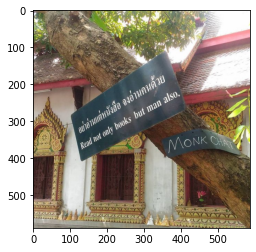

In [4]:
check_tensor(sign)
plt.imshow(sign)

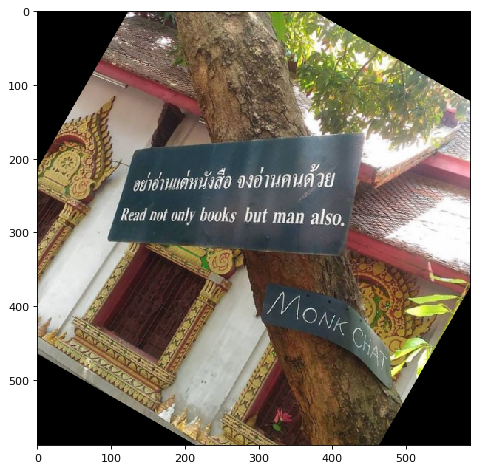

In [5]:
sign_rotate = transform.rotate(sign,330)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(sign_rotate)

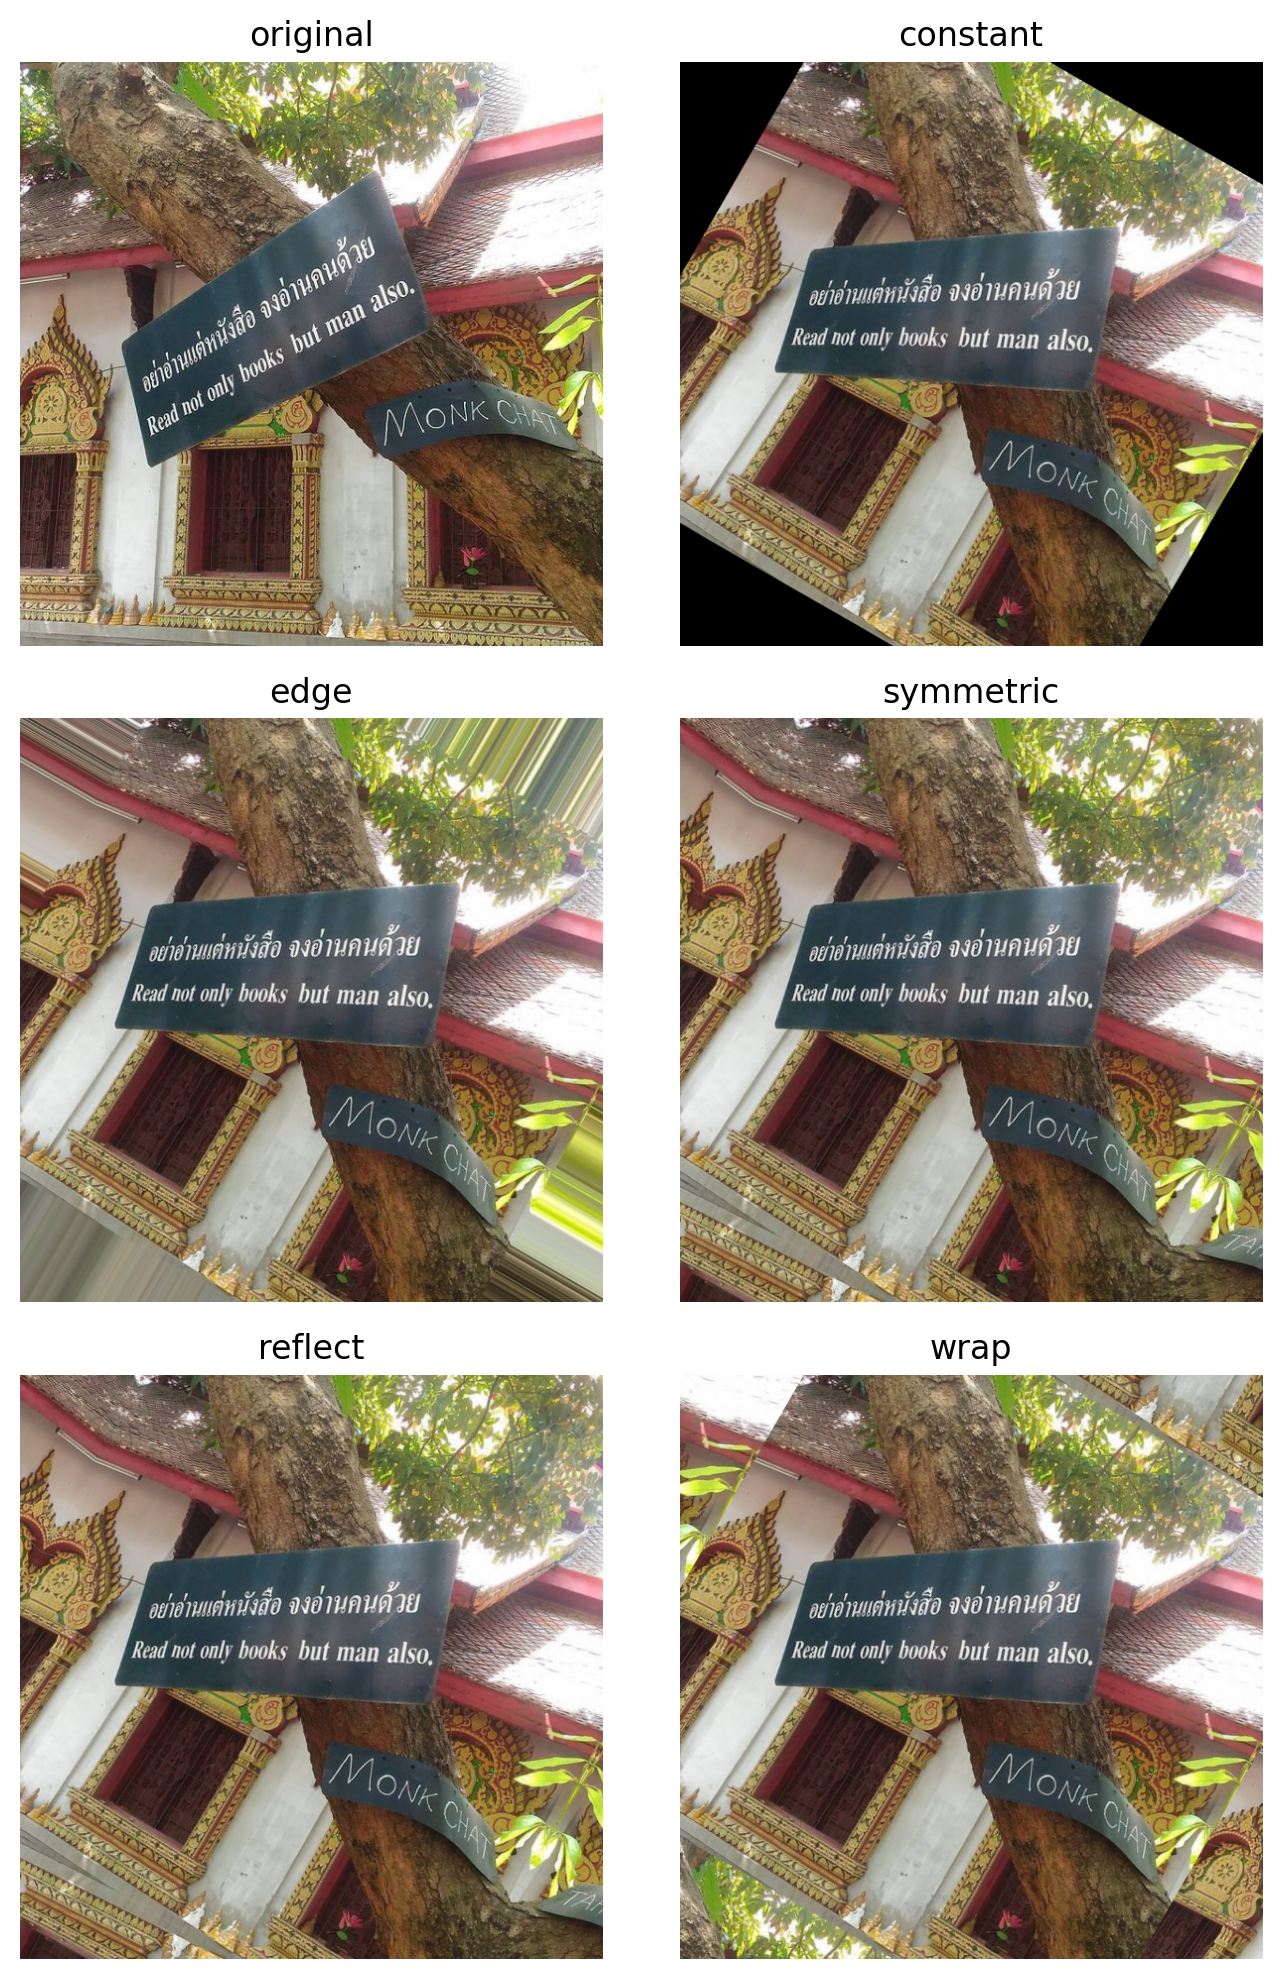

In [6]:
def rotate_fills(image):
    modes = ['constant', 'edge','symmetric','reflect','wrap']
    fig, ax = plt.subplots(3,2, figsize=(7, 10), dpi = 200)
    for n, ax in enumerate(ax.flatten()):
        n = n-1
        if n == -1:
            ax.set_title(f'original', fontsize = 12)
            ax.imshow(image)
            ax.set_axis_off()
        else: 
            ax.set_title(f'{modes[n]}', fontsize = 12)
            ax.imshow(transform.rotate(image, 330, mode = modes[n]))
            ax.set_axis_off()
        
    fig.tight_layout();
rotate_fills(sign)

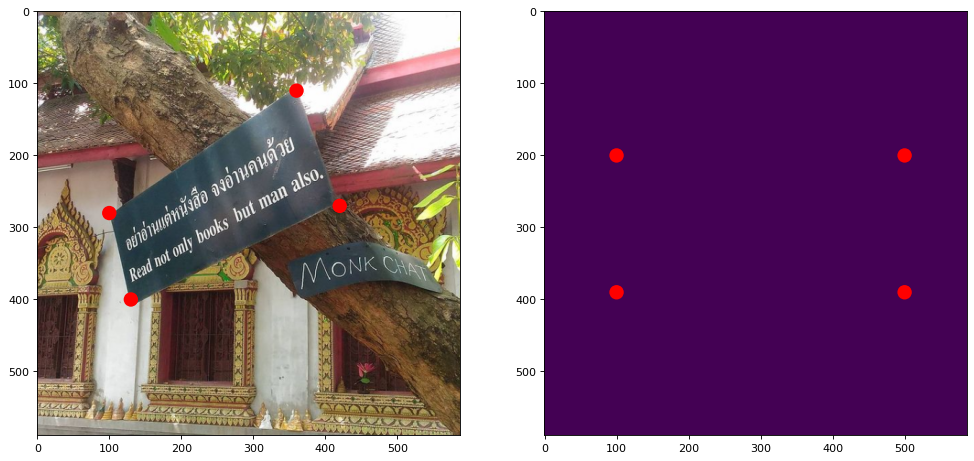

In [7]:
points_of_interest =[[360, 110], 
                     [420, 270], 
                     [130, 400], 
                     [100, 280]]
projection = [[500, 200],
              [500, 390],
              [100, 390],
              [100, 200]]
color = 'red'
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
patch1 = Circle((points_of_interest[0][0],points_of_interest[0][1]),
                 10, facecolor = color)
patch2 = Circle((points_of_interest[1][0],points_of_interest[1][1]), 
                 10, facecolor = color)
patch3 = Circle((points_of_interest[2][0],points_of_interest[2][1]),
                 10, facecolor = color)
patch4 = Circle((points_of_interest[3][0],points_of_interest[3][1]), 
                 10, facecolor = color)
patch5 = Circle((projection[0][0],projection[0][1]), 10, 
                 facecolor = color)
patch6 = Circle((projection[1][0],projection[1][1]), 10, 
                 facecolor = color)
patch7 = Circle((projection[2][0],projection[2][1]), 10, 
                 facecolor = color)
patch8 = Circle((projection[3][0],projection[3][1]), 10, 
                 facecolor = color)
ax[0].add_patch(patch1)
ax[0].add_patch(patch2)
ax[0].add_patch(patch3)
ax[0].add_patch(patch4)
ax[0].imshow(sign);
ax[1].add_patch(patch5)
ax[1].add_patch(patch6)
ax[1].add_patch(patch7)
ax[1].add_patch(patch8)
ax[1].imshow(np.ones((sign.shape[0], sign.shape[1])));

<Figure size 640x480 with 0 Axes>

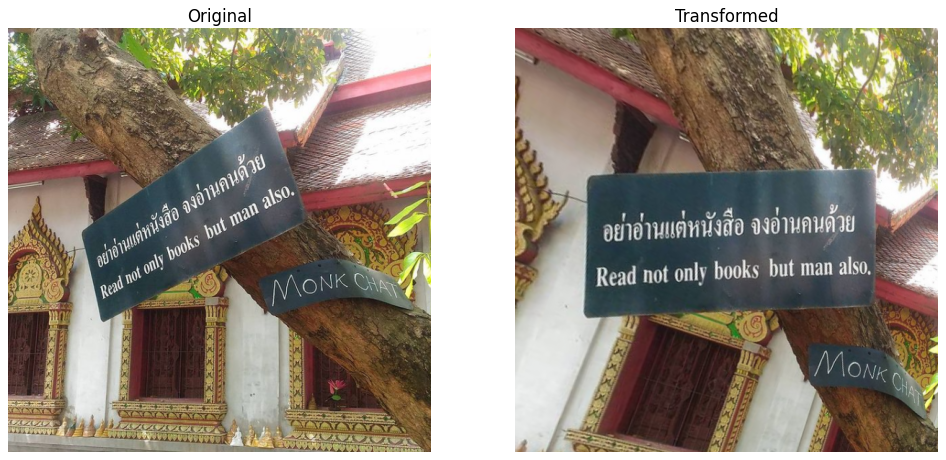

In [8]:
points_of_interest = np.array([[360, 110], 
                               [420, 270], 
                               [130, 400], 
                               [100, 280]])
projection = np.array([[500, 200],
                       [500, 390],
                       [100, 390],
                       [100, 200]])
tform = transform.estimate_transform('projective', points_of_interest, projection)
tf_img_warp = transform.warp(sign, tform.inverse, mode = 'symmetric')
plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(sign)
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
ax[1].set_axis_off()

## Example2

1. Write a user interface to collect the four corners of the billboard in the image. Let’s call these points pts_dst<br>
2. Let the size of the image you want to put on the virtual billboard be w x h. The corners of the image ( pts_src ) are therefore to be (0,0), (w-1,0), (w-1,h-1) and (0,h-1)<br>
3. Obtain the homography using pts_src and pts_dst .<br>
4. Apply the homography to the source image and blend it with the destination image to obtain the image in Figure 6.<br>
5. url: https://learnopencv.com/homography-examples-using-opencv-python-c/#download

Type: <class 'numpy.ndarray'>
Shape: (589, 587, 3)
dtype: uint8
Type: <class 'numpy.ndarray'>
Shape: (589, 587, 3)
dtype: uint8


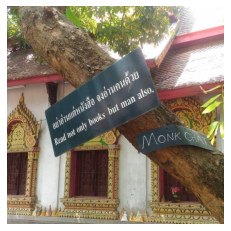

In [9]:
# Read source image
im_src = cv2.imread(img_path)
im_src_RGB = cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB)
check_tensor(im_src)
check_tensor(im_src_RGB)
show_img(im_src_RGB)

In [10]:
# Four corners in source image
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]])
check_tensor(pts_src)
# Read destination image.
im_dst = cv2.imread(img_path)
im_dst_RGB = cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB)
check_tensor(im_dst_RGB)

# Four corners of the book in destination image.
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]])
check_tensor(pts_dst)

# Calculate Homography
h, status = cv2.findHomography(pts_src, pts_dst)
check_tensor(h)
print("h:",h)
# Warp source image to destination based on homography
im_out = cv2.warpPerspective(im_src_RGB, h, (im_dst_RGB.shape[1],im_dst_RGB.shape[0]))
check_tensor(im_out)

Type: <class 'numpy.ndarray'>
Shape: (4, 2)
dtype: int64
Type: <class 'numpy.ndarray'>
Shape: (589, 587, 3)
dtype: uint8
Type: <class 'numpy.ndarray'>
Shape: (4, 2)
dtype: int64
Type: <class 'numpy.ndarray'>
Shape: (3, 3)
dtype: float64
h: [[ 4.34043935e-01 -4.19622184e-01  2.91709494e+02]
 [ 1.46491654e-01  4.41418278e-01  1.61369294e+02]
 [-3.62463336e-04 -9.14274844e-05  1.00000000e+00]]
Type: <class 'numpy.ndarray'>
Shape: (589, 587, 3)
dtype: uint8


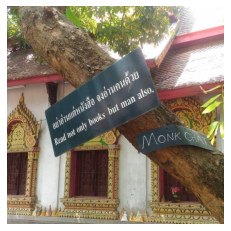

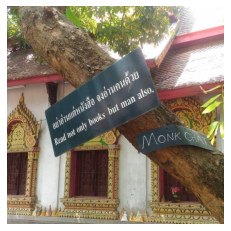

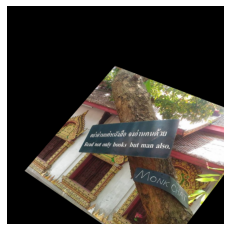

In [11]:
# Display images
show_img(im_src_RGB)
show_img(im_dst_RGB)
show_img(im_out)

## Example 3

url: https://www.geeksforgeeks.org/python-opencv-object-tracking-using-homography/

Type: <class 'numpy.ndarray'>
Shape: (659, 499, 3)
dtype: uint8
Type: <class 'numpy.ndarray'>
Shape: (659, 499, 3)
dtype: uint8


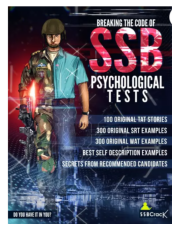

In [12]:
img_test3  = cv2.imread('./data/test2.png')
img_test3_RGB = cv2.cvtColor(img_test3, cv2.COLOR_BGR2RGB)
check_tensor(img_test3)
check_tensor(img_test3_RGB)
show_img(img_test3_RGB)

Feature Matching

In [13]:
# creating the SIFT algorithm
sift = cv2.xfeatures2d.SIFT_create()
print(sift)

< cv2.SIFT 0x2aa302090>


[ WARN:0@4.065] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [14]:
# find the keypoints and descriptors with SIFT
kp_image, desc_image =sift.detectAndCompute(img_test3_RGB, None)
print(type(kp_image))
print(type(desc_image))

<class 'tuple'>
<class 'numpy.ndarray'>


In [15]:
check_tensor(desc_image)

Type: <class 'numpy.ndarray'>
Shape: (4256, 128)
dtype: float32


In [16]:
# initializing the dictionary
index_params = dict(algorithm = 0, trees = 5)
search_params = dict()

In [17]:
# by using Flann Matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)
print(type(flann))

<class 'cv2.FlannBasedMatcher'>


Type: <class 'numpy.ndarray'>
Shape: (659, 499)
dtype: uint8


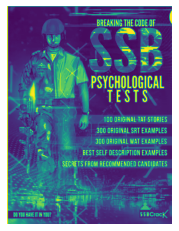

In [18]:
# converting the frame into grayscale
grayframe = cv2.cvtColor(img_test3_RGB, cv2.COLOR_BGR2GRAY)
check_tensor(grayframe)
show_img(grayframe)

In [19]:
# find the keypoints and descriptors with SIFT
kp_grayframe, desc_grayframe = sift.detectAndCompute(grayframe, None)
print(type(kp_grayframe))
print(type(desc_grayframe)) 
print(desc_grayframe)

<class 'tuple'>
<class 'numpy.ndarray'>
[[  0.   0.   0. ...   0.   0.   0.]
 [ 15.  36.   6. ...   0.   0.   6.]
 [  2.   1.   0. ...   0.   0.   0.]
 ...
 [  1.   2.   2. ...   0.   0.   0.]
 [ 63.  58.  13. ...   0.   0.   0.]
 [ 23. 137. 116. ...   0.   0.   0.]]


In [20]:
# finding nearest match with KNN algorithm
matches= flann.knnMatch(desc_image, desc_grayframe, k=2)
print(type(matches))

<class 'tuple'>


In [21]:
 
# initialize list to keep track of only good points
good_points=[]
 
for m, n in matches:
    #append the points according
    #to distance of descriptors
    if(m.distance < 0.6*n.distance):
        good_points.append(m)

Homography

In [22]:
# maintaining list of index of descriptors
# in query descriptors
query_pts = np.float32([kp_image[m.queryIdx]
                 .pt for m in good_points]).reshape(-1, 1, 2)
check_tensor(query_pts)
print(query_pts)

Type: <class 'numpy.ndarray'>
Shape: (4256, 1, 2)
dtype: float32
[[[  4.1451225 585.1867   ]]

 [[  4.3960648 566.7928   ]]

 [[  4.5637794 620.65204  ]]

 ...

 [[494.40836    52.006454 ]]

 [[495.12265   523.3014   ]]

 [[495.12265   523.3014   ]]]


In [23]:

# maintaining list of index of descriptors
# in train descriptors
train_pts = np.float32([kp_grayframe[m.trainIdx]
                 .pt for m in good_points]).reshape(-1, 1, 2)
 
check_tensor(train_pts)
print(train_pts)

Type: <class 'numpy.ndarray'>
Shape: (4256, 1, 2)
dtype: float32
[[[  4.1451225 585.1867   ]]

 [[  4.3960648 566.7928   ]]

 [[  4.5637794 620.65204  ]]

 ...

 [[494.40836    52.006454 ]]

 [[495.12265   523.3014   ]]

 [[495.12265   523.3014   ]]]


In [24]:

# finding  perspective transformation
# between two planes
matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
check_tensor(matrix)
print(matrix)
check_tensor(mask)
print(mask)

Type: <class 'numpy.ndarray'>
Shape: (3, 3)
dtype: float64
[[ 1.00000000e+00  8.47386624e-16 -1.47897636e-12]
 [ 9.56142982e-15  1.00000000e+00 -3.04792564e-12]
 [ 2.31242698e-17  2.39703208e-18  1.00000000e+00]]
Type: <class 'numpy.ndarray'>
Shape: (4256, 1)
dtype: uint8
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [25]:

# ravel function returns
# contiguous flattened array
matches_mask = mask.ravel().tolist()
check_tensor(matches_mask)


Type: <class 'list'>
len: 4256


Perspective transform

In [26]:
# initializing height and width of the image
h, w, c = img_test3_RGB.shape
print(h,w,c)
# saving all points in pts
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
check_tensor(pts)
print(pts)


659 499 3
Type: <class 'numpy.ndarray'>
Shape: (4, 1, 2)
dtype: float32
[[[  0.   0.]]

 [[  0. 659.]]

 [[499. 659.]]

 [[499.   0.]]]


In [27]:
check_tensor(pts)
check_tensor(matrix)

Type: <class 'numpy.ndarray'>
Shape: (4, 1, 2)
dtype: float32
Type: <class 'numpy.ndarray'>
Shape: (3, 3)
dtype: float64


In [28]:
# applying perspective algorithm
dst = cv2.perspectiveTransform(pts, matrix)
print(type(dst))
check_tensor(dst)
print(dst)

<class 'numpy.ndarray'>
Type: <class 'numpy.ndarray'>
Shape: (4, 1, 2)
dtype: float32
[[[-1.4789763e-12 -3.0479256e-12]]

 [[-9.2054858e-13  6.5900000e+02]]

 [[ 4.9900000e+02  6.5900000e+02]]

 [[ 4.9900000e+02  1.7232278e-12]]]


final output

Type: <class 'numpy.ndarray'>
Shape: (659, 499, 3)
dtype: uint8


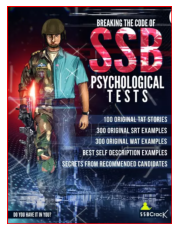

In [29]:
homography = cv2.polylines(img_test3_RGB, [np.int32(dst)], True, (255, 0, 0), 3)
check_tensor(homography)
# showing the final output
# with homography
show_img(homography)